## **Linear Regression**

In [ ]:
# basic imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# imports for splitting into training and testing set

from sklearn.model_selection import train_test_split

# imports for linear, ridge and lasso regression

from sklearn.linear_model import LinearRegression

In [ ]:
# import Boston housing dataset which is an inbuilt dataset of scikit learn

from sklearn.datasets import load_boston
boston=load_boston()
boston

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [ ]:
# dataframe creation

boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.DataFrame(boston['target'])
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
boston_df.mean()
#boston_df.mean(axis=0)
#boston_df.mean(axis=1)

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
target      22.532806
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f71a33a6790>]],
      dtype=object)

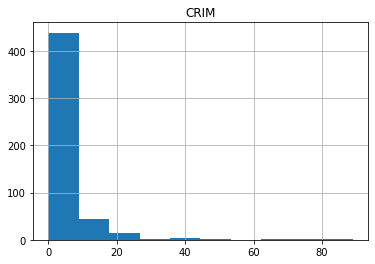

In [ ]:
boston_df.hist(column='CRIM', bins=10)

In [ ]:
# Split the data into X (input) and Y (output)

X = boston_df[boston['feature_names']]
Y = boston_df.target

TrainX = np.asarray(X)
TrainY = np.asarray(Y)

# further splitting X (input) and Y (output) into 80% training data and 20% test data

x_train, x_test, y_train, y_test = train_test_split(TrainX, TrainY, test_size=0.2, random_state=10)

#print(x_train)
#print(x_test)
#print(y_train)
#print(y_test)

In [ ]:
# linear regression

linReg = LinearRegression().fit(x_train, y_train)
print(linReg.coef_)
print(linReg.intercept_)

print(linReg.predict(x_test))

[-1.28180656e-01  6.31981786e-02 -7.57627602e-03  1.97451452e+00
 -1.62719890e+01  3.10845625e+00  1.62922153e-02 -1.48301360e+00
  3.03988206e-01 -1.20820710e-02 -8.20305699e-01  1.14189890e-02
 -5.81626431e-01]
36.5330513828244
[31.0789639  31.721694   30.87314928 22.28234976 18.85606115 16.47132499
 36.05004157 14.64032337 25.24078574 36.92073901 21.24395893 31.05887245
 27.83837442 33.90940352 33.94484713 40.02040311 24.14373978 23.32713796
 25.34120561 21.49039367 32.84083784 17.72022746 25.36791791 24.95097385
 32.39265827 20.42497001 19.33257493 16.97042135 38.61885431  0.99817403
 32.18145419 32.02985417 26.01208772 23.68917386 20.38030786 19.45806916
  3.46147073 34.9034939  26.98281534 27.54218642 33.89021463 29.7542196
 18.15540973 31.44609872 17.82446519 28.30204573 19.31527567 21.90113613
 37.88043957 16.3464837  24.68739442 19.29872222 24.46627252 33.91063878
 26.63876989 34.33425076 20.88039511 19.69421544 18.70556587 24.73298651
 19.89555718 23.36114411 39.77392395 42.0

## **Logistic Regression**

In [ ]:
# import for logistic regression

from sklearn.linear_model import LogisticRegression

[10 13 13 49 19 29 31 46 33 16 34]
(1000,)
[0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1.]
(1000,)
[-1 -4 -4 -4  2  4 -5  4  5 -5 -3]
(1000,)
[ 9  9  9 45 21 33 26 50 38 11 31]
(1000,)


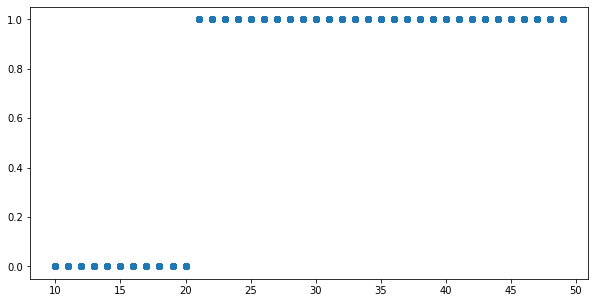

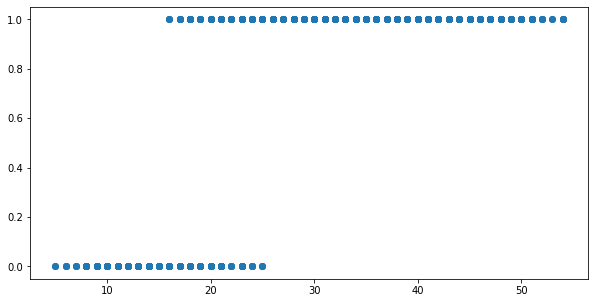

(1000, 1)


In [ ]:
np.random.seed(0)

# training data

x_train_basic = np.random.randint(low=10, high=50, size=1000)

print(x_train_basic[:11])
print(x_train_basic.shape)

y_train = np.zeros(1000)
y_train[x_train_basic >= 21] = 1

print(y_train[:11])
print(y_train.shape)

noise_train = np.random.randint(low=-5, high=6, size=1000)
print(noise_train[:11])
print(noise_train.shape)

x_train_final = x_train_basic + noise_train
print(x_train_final[:11])
print(x_train_final.shape)

plt.figure(figsize=(10, 5))
plt.scatter(x_train_basic, y_train)
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(x_train_final, y_train)
plt.show()

x_train_final = x_train_final.reshape(-1, 1)
print(x_train_final.shape)

[13 17 18 47 15 43 38 48 18 11 12]
(1000,)
[0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.]
(1000,)
[ 4  1 -4  5 -3  1 -3 -5 -5  1  4]
(1000,)
[17 18 14 52 12 44 35 43 13 12 16]
(1000,)


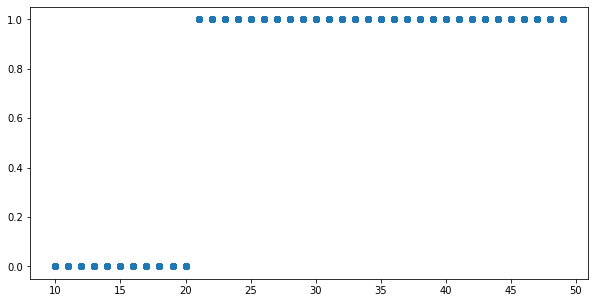

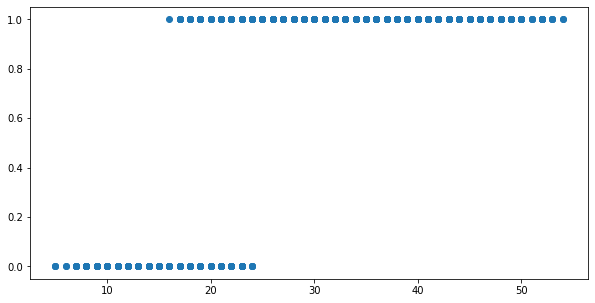

(1000, 1)


In [ ]:
# testing data

x_test_basic = np.random.randint(low=10, high=50, size=1000)

print(x_test_basic[:11])
print(x_test_basic.shape)

y_test = np.zeros(1000)
y_test[x_test_basic >= 21] = 1

print(y_test[:11])
print(y_test.shape)

noise_test = np.random.randint(low=-5, high=6, size=1000)
print(noise_test[:11])
print(noise_test.shape)

x_test_final = x_test_basic + noise_test
print(x_test_final[:11])
print(x_test_final.shape)

plt.figure(figsize=(10, 5))
plt.scatter(x_test_basic, y_test)
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(x_test_final, y_test)
plt.show()

x_test_final = x_test_final.reshape(-1, 1)
print(x_test_final.shape)

In [ ]:
# logistic regression

model_logistic = LogisticRegression()
model_logistic.fit(x_train_final, y_train)

print(model_logistic.classes_)
print(model_logistic.intercept_)
print(model_logistic.coef_)

print(x_test_final[-5:])
print(model_logistic.predict_proba(x_test_final)[-5:])

[0. 1.]
[-11.65852743]
[[0.57702848]]
[[18]
 [44]
 [35]
 [19]
 [47]]
[[7.81087466e-01 2.18912534e-01]
 [1.08848191e-06 9.99998912e-01]
 [1.95947229e-04 9.99804053e-01]
 [6.67075256e-01 3.32924744e-01]
 [1.92761704e-07 9.99999807e-01]]
